# Predicting Heart Disease using Machine Learning

This notebook looks into various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given the clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data cam from the Cleavland data from the UCI Machine Learning Repository.

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation
> If we reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
This is where we get different information about each of the features in your data.
**Create Data Dictionary**
* Column Descriptions:
* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

## Import Statements

In [37]:
# Preparing Tools - Data Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn - Data Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Model Evaluations - Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

## Load Data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape # (rows, columns)

(303, 14)

## Data Exploration (EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

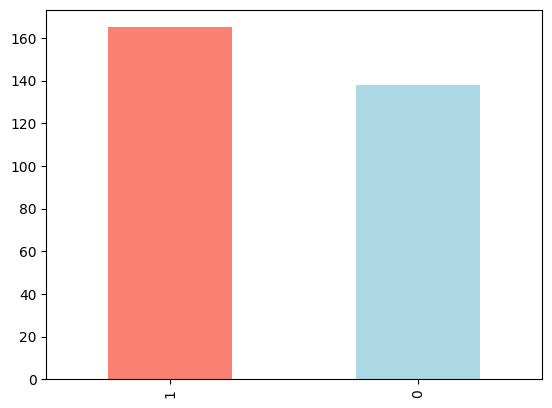

In [6]:
df.target.value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column with sex column
sub_df = pd.crosstab(df.target, df.sex)
sub_df

sex,0,1
target,,
0,24,114
1,72,93


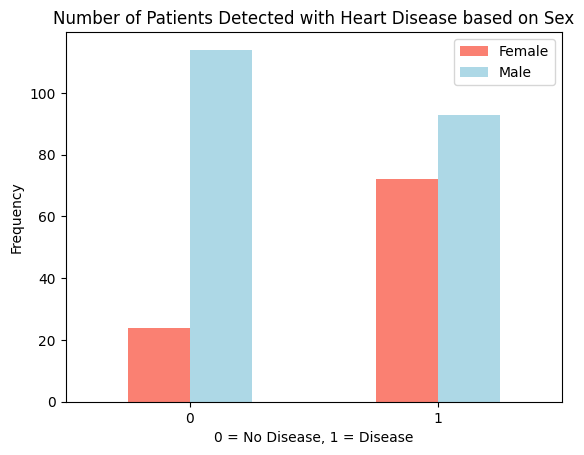

In [11]:
sub_df.plot(kind='bar', color=['salmon', 'lightblue']);
plt.title('Number of Patients Detected with Heart Disease based on Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Frequency')
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

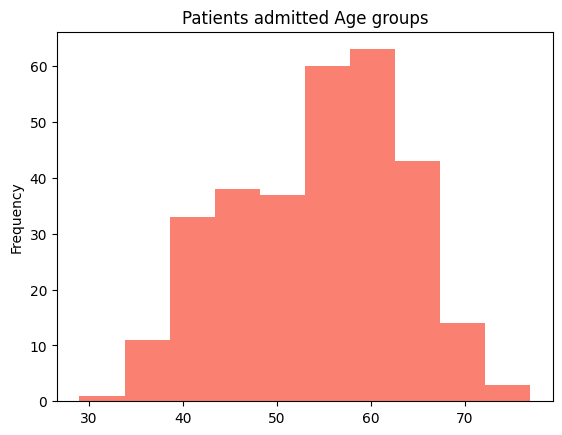

In [12]:
df['age'].plot(kind='hist', color=['salmon']);
plt.title('Patients admitted Age groups');

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df['thalach'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age  Vs Heart Rate for Heart Disease

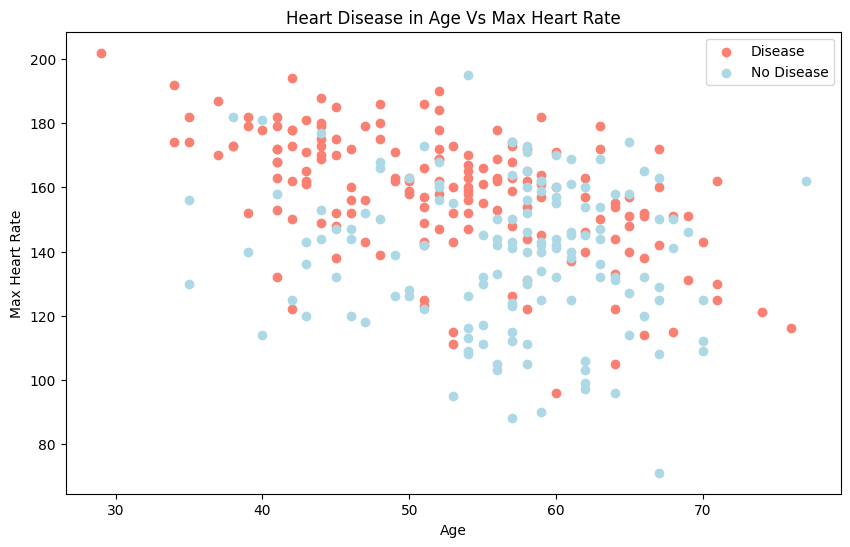

In [15]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color='salmon');

# Scatter with negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color='lightblue');

# Add Legend
plt.legend(['Disease', 'No Disease'])
plt.title('Heart Disease in Age Vs Max Heart Rate')
plt.ylabel('Max Heart Rate')
plt.xlabel('Age');

### Chest Pain Vs Heart Disease

In [16]:
sub_df = pd.crosstab(df.cp, df.target)
sub_df

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


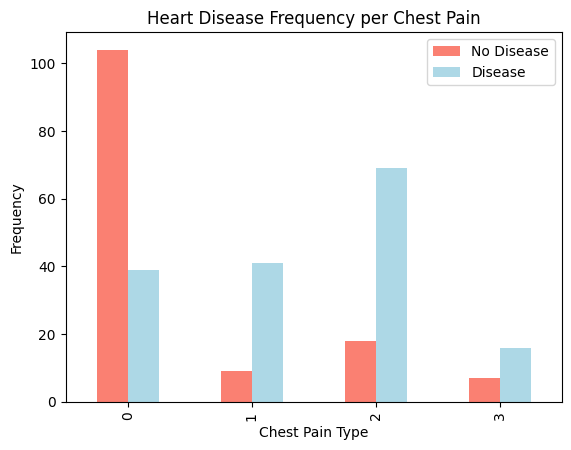

In [17]:
sub_df.plot(kind='bar', color=['salmon', 'lightblue']);
plt.legend(['No Disease', 'Disease']);

plt.title('Heart Disease Frequency per Chest Pain')
plt.ylabel('Frequency')
plt.xlabel('Chest Pain Type');

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# Make a correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


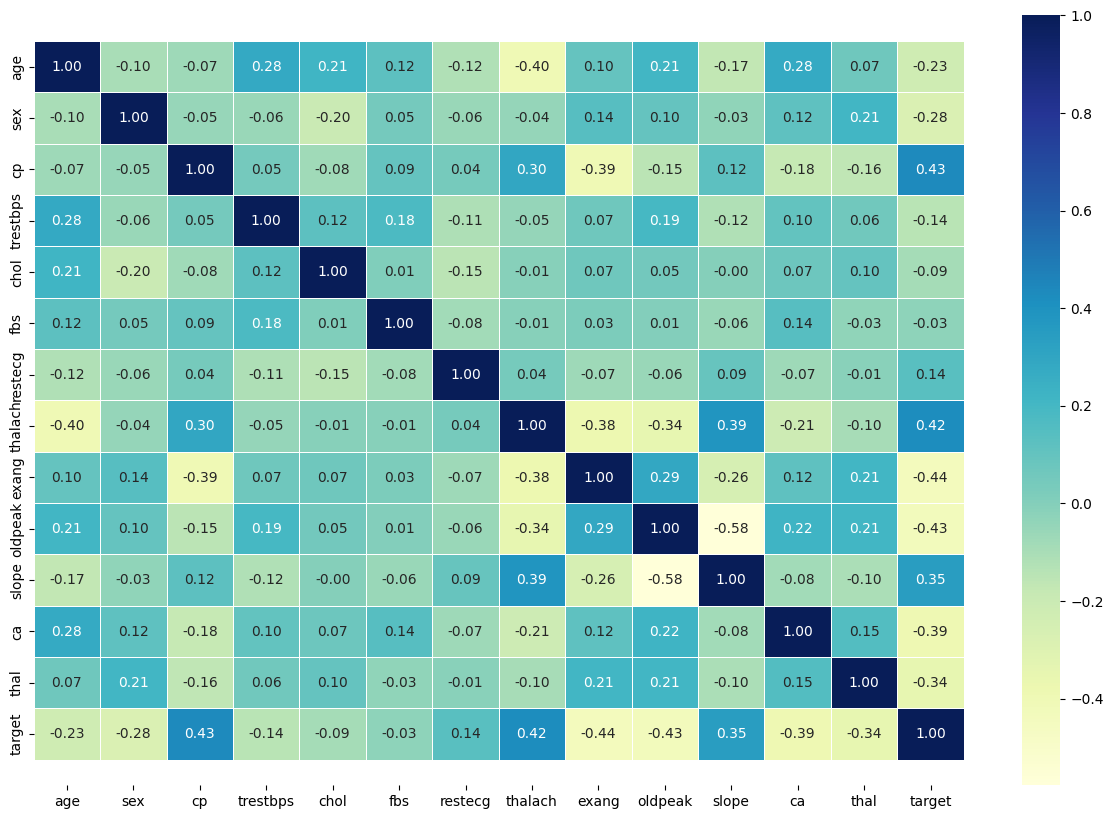

In [20]:
# Let's visualize out correlation matrix
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr, annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu');
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
fig.savefig('Correlation')

## 5. Modelling

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [60]:
# Put models in a dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Create a function to fit and score models
def fit_score(models, x_tr, x_tst, y_tr, y_tst):
    '''
    Fits and evaluates given machine learning models.
    models: a dict of different scikit-learn machine learning models
    x_tr, y_tr: training labels
    x_tst, y_tst: testing labels
    '''
    # Set random seed
    np.random.seed(2)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_tr, y_tr)
        # Evaluate the model and append it's score to model_scores
        model_scores[name] = model.score(x_tst, y_tst)
        
    return model_scores

In [61]:
x = df.drop('target', axis=1)
y = df['target']

np.random.seed(4)

x_tr, x_tst, y_tr, y_tst = train_test_split(x, y, test_size=0.2)
x_tr.shape, x_tst.shape

((242, 13), (61, 13))

In [64]:
model_scores = fit_score(models, x_tr, x_tst, y_tr, y_tst)

C:\Users\Karth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


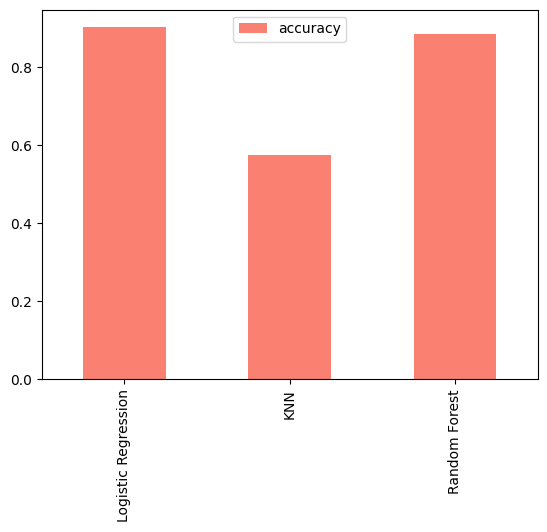

In [68]:
model_df = pd.DataFrame(model_scores, index=['accuracy'])
model_df.T.plot.bar(color='salmon');

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

* Find out the best model tuning hyperparameters
* Look into KNN
* Feature importance
* Cross-Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* AUC

## Hyperparameters Tuning

In [70]:
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_tr, y_tr)
    
    # Update the training & testing scores list
    train_scores.append(knn.score(x_tr, y_tr))
    test_scores.append(knn.score(x_tst, y_tst))
    
train_scores

[1.0,
 0.8057851239669421,
 0.7933884297520661,
 0.7520661157024794,
 0.768595041322314,
 0.7520661157024794,
 0.731404958677686,
 0.7355371900826446,
 0.7396694214876033,
 0.7107438016528925,
 0.7231404958677686,
 0.6818181818181818,
 0.7024793388429752,
 0.6900826446280992,
 0.7066115702479339,
 0.6818181818181818,
 0.6776859504132231,
 0.6611570247933884,
 0.6859504132231405,
 0.6735537190082644]

In [71]:
test_scores

[0.5409836065573771,
 0.6229508196721312,
 0.7049180327868853,
 0.6885245901639344,
 0.5737704918032787,
 0.639344262295082,
 0.639344262295082,
 0.5901639344262295,
 0.639344262295082,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.6885245901639344,
 0.7049180327868853,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361]

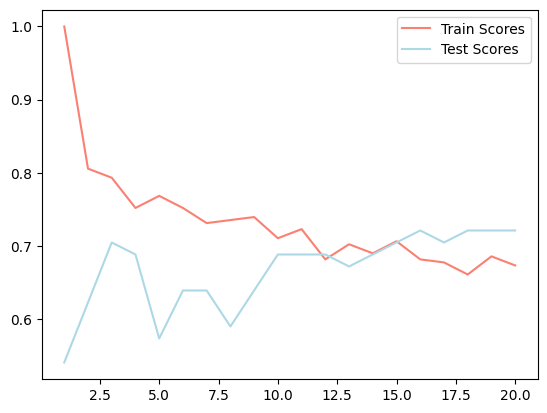

Maximum KNN score on the test data: 72.13%


In [75]:
plt.plot(neighbors, train_scores, label='Train Scores', color='salmon')
plt.plot(neighbors, test_scores, label='Test Scores', color='lightblue')
plt.legend()
plt.show();

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

## RandomizedSearchCV